In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
datos = pd.read_csv('/content/conjunto_de_datos_ingresos_enigh_2018_ns.csv')

datos.sample(n=6)

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri
12807,201457801,1,3,P053,9,8,7,6,5,4,0,0,0,0,0,12000,5901.63
224721,2106048619,1,2,P002,9,8,7,6,5,4,4000,4000,4800,4800,4800,4800,13377.04
250652,2360003307,1,1,P009,,,,,,,7000,,,,,,1711.95
111034,1001953002,1,4,P001,10,9,8,7,6,5,5200,5200,5200,5200,5200,5200,15260.86
287514,2660692008,1,1,P032,10,9,8,7,6,5,2000,2000,2000,2000,2000,2000,5869.56
229,100073403,1,2,P001,8,7,6,5,4,3,7200,7200,7200,7200,7200,7200,21130.43


In [ ]:
hogar_principal = datos['foliohog'] == 1

ingreso_hogar_principal = datos[hogar_principal]

In [ ]:
ingreso_hogar_principal.sample(n=6)

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri
164253,1524319417,1,4,P001,8,7,6,5,4,3,1800,1080,1200,0,0,0,1995.65
56082,505933314,1,1,P008,,,,,,,2000,,,,,,489.13
276456,2560423914,1,1,P001,10,9,8,7,6,5,4440,4440,4440,4440,4440,4440,13030.43
164906,1527006218,1,1,P008,,,,,,,3000,,,,,,745.85
214553,2060175913,1,1,P068,10,9,8,7,6,5,1440,1520,1410,1400,1300,1520,4201.63
5111,101742506,1,1,P003,10,9,8,7,6,5,15000,15000,15000,15000,15000,15000,44021.73


In [ ]:
datos['folioviv'].nunique()

73355

In [ ]:
datos.shape 

(348487, 17)

In [ ]:
ingreso_hogar_principal.shape

(344078, 17)

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df_updated = ingreso_hogar_principal.replace(to_replace="\s\s*",value = '0',regex=True)

In [ ]:
df_updated.sample(n=10)

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri
276503,2560427413,1,4,P042,8,7,6,5,4,3,350,0,0,0,700,0,513.58
227947,2161082423,1,2,P078,10,9,8,7,6,5,283,283,283,283,283,283,830.54
96998,860600601,1,2,P022,9,8,7,6,5,4,0,0,0,800,0,0,393.44
195836,1860305411,1,3,P001,8,7,6,5,4,3,4500,1800,1800,750,750,6000,7630.43
77314,703791422,1,4,P042,8,7,6,5,4,3,1015,0,0,2030,0,1015,1985.86
170364,1600351706,1,1,P001,9,8,7,6,5,4,14000,14000,14000,14000,14000,14000,41311.47
322083,3062675801,1,1,P071,9,8,7,6,5,4,88,88,88,88,88,88,259.67
114825,1060171218,1,3,P008,0,0,0,0,0,0,2500,0,0,0,0,0,621.54
1904,100578002,1,4,P051,10,9,8,7,6,5,0,0,0,0,0,200,97.82
91865,807490004,1,1,P009,0,0,0,0,0,0,2000,0,0,0,0,0,489.13


In [ ]:
df_updated['ing_2'] = df_updated['ing_2'].astype(str)
df_updated['ing_3']  = df_updated['ing_3'].astype(str)
df_updated['ing_4'] = df_updated['ing_4'].astype(str)
df_updated['ing_5'] = df_updated['ing_5'].astype(str)
df_updated['ing_6'] = df_updated['ing_6'].astype(str)

In [ ]:
df_updated['ing_2'] = df_updated['ing_2'].astype(float)
df_updated['ing_3'] = df_updated['ing_3'].astype(float)
df_updated['ing_4'] = df_updated['ing_4'].astype(float)
df_updated['ing_5'] = df_updated['ing_5'].astype(float)
df_updated['ing_6'] = df_updated['ing_6'].astype(float)

In [ ]:
df_updated.dtypes

folioviv      int64
foliohog      int64
numren        int64
clave        object
mes_1        object
mes_2        object
mes_3        object
mes_4        object
mes_5        object
mes_6        object
ing_1         int64
ing_2       float64
ing_3       float64
ing_4       float64
ing_5       float64
ing_6       float64
ing_tri     float64
dtype: object

In [ ]:
ingreso_promedio =  pd.melt(df_updated, id_vars=['folioviv'], value_vars=['ing_1', 'ing_2', 'ing_3', 'ing_4', 'ing_5','ing_6'])
ingreso_promedio.sample(n=6)

,folioviv,variable,value
1622444,2302964318,ing_5,0.0
1801088,762002222,ing_6,950.0
436929,860035922,ing_2,12000.0
612335,2504234802,ing_2,0.0
904043,2061646902,ing_3,800.0
513259,1601344702,ing_2,500.0


In [ ]:
ingreso_promedio = ingreso_promedio.groupby(['folioviv'])[['value']].mean()
ingreso_promedio = ingreso_promedio.rename(columns={"value": "Ingreso Promedio"})
ingreso_promedio = ingreso_promedio.reset_index()
ingreso_promedio.head()

,folioviv,Ingreso Promedio
0,100013601,5412.500000
1,100013602,557.216667
2,100013603,9902.777778
3,100013604,3416.666667
4,100013606,7325.000000


In [ ]:
ingreso_promedio_t = ingreso_promedio['Ingreso Promedio']

ingreso_promedio_t.head()

0    5412.500000
1     557.216667
2    9902.777778
3    3416.666667
4    7325.000000
Name: Ingreso Promedio, dtype: float64

In [ ]:
# Falta terminar de convertir todas las columnas, con un loop se puede lograr.
ingreso_total = ingreso_hogar_principal.groupby(['folioviv']).agg({'ing_tri':sum})

In [ ]:
ingreso_total = ingreso_total.reset_index()

In [ ]:
ingreso_total.sample(n=10)

,folioviv,ing_tri
10160,501371503,42705.95
57684,2504089002,42309.75
50813,2260050804,39811.46
15421,660095421,17608.69
174,100272306,49817.89
19837,860087724,43972.12
30511,1301714411,3169.56
33076,1412586205,51314.90
37263,1603366604,66958.98
36665,1562125211,30253.87


In [ ]:
dataframe_final = pd.concat([ingreso_total,ingreso_promedio_t], axis=1)

dataframe_final.head()

,folioviv,ing_tri,Ingreso Promedio
0,100013601,63885.23,5412.500000
1,100013602,16442.41,557.216667
2,100013603,171393.40,9902.777778
3,100013604,30245.88,3416.666667
4,100013606,43229.49,7325.000000


In [ ]:
dataframe_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73355 entries, 0 to 73354
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folioviv          73355 non-null  int64  
 1   ing_tri           73355 non-null  float64
 2   Ingreso Promedio  73355 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.7 MB


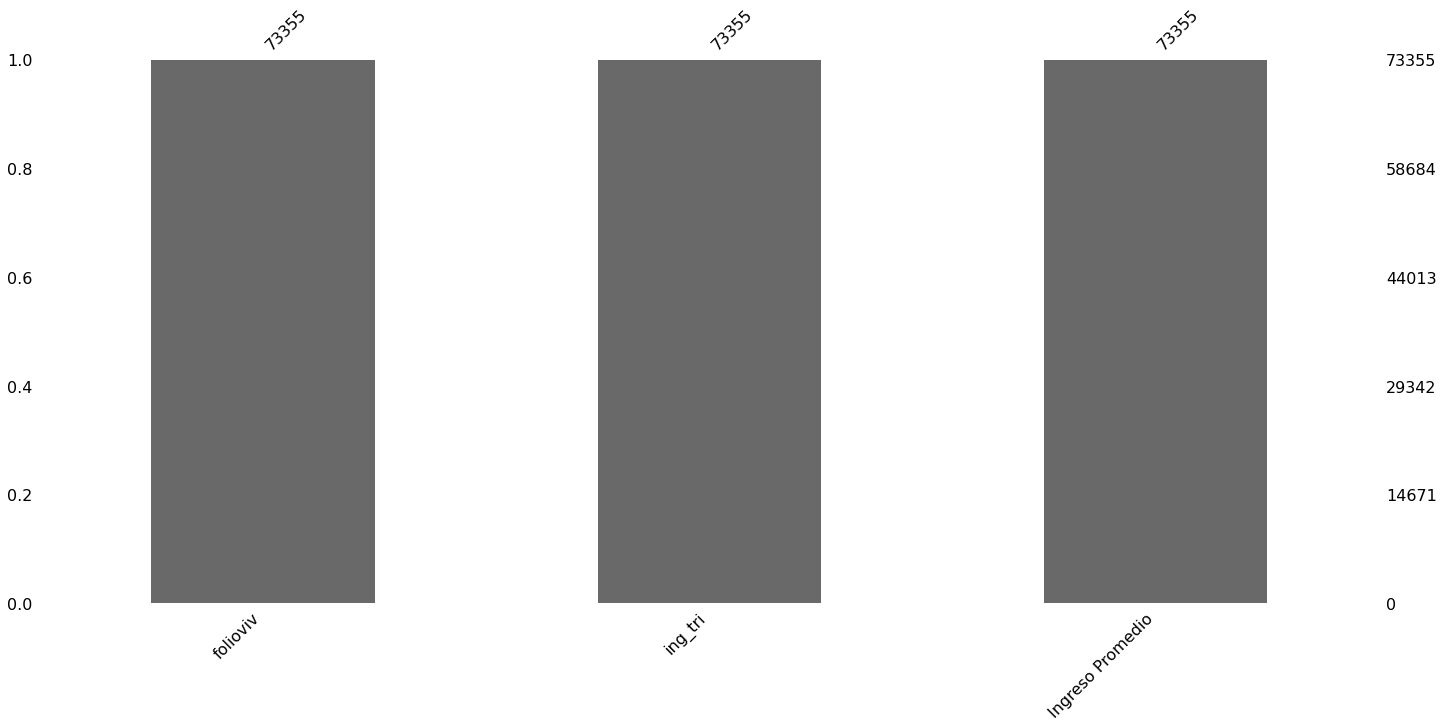

In [ ]:
import missingno as msno
msno.bar(dataframe_final)

In [ ]:
species_counts = dataframe_final.groupby('folioviv')['ing_tri'].count()

In [ ]:
%matplotlib inline
# Creaemos una gráfica de barras
species_counts.plot(kind='bar');

In [ ]:
dataframe_final.to_csv('datos_totales.csv')